# **Facial Expressions Saturdays Ai**

Proyecto de la primera edición de Donostia de Saturdays Ai 2020.


1. Importación de librerías

In [1]:
import boto3, re
import sagemaker

sagemaker_session = sagemaker.Session()

region = sagemaker_session.boto_session.region_name

bucket = sagemaker.Session().default_bucket()   # Default S3 URI. Replace it with your S3 URI if you want.

In [2]:
import cv2, os
import numpy as np 
import pandas as pd
from sagemaker import get_execution_role
from sagemaker.tensorflow import TensorFlow
from tqdm import tqdm
!pip install tensorflow -t ./
from tensorflow.python.keras.utils import np_utils

  Using cached tensorflow-2.4.0-cp36-cp36m-manylinux2010_x86_64.whl (394.7 MB)
  Using cached absl_py-0.11.0-py3-none-any.whl (127 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached grpcio-1.32.0-cp36-cp36m-manylinux2014_x86_64.whl (3.8 MB)
  Using cached h5py-2.10.0-cp36-cp36m-manylinux1_x86_64.whl (2.9 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached numpy-1.19.5-cp36-cp36m-manylinux2010_x86_64.whl (14.8 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached protobuf-3.14.0-cp36-cp36m-manylinux1_x86_64.whl (1.0 MB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached tensorboard-2.4.1-py3-none-any.whl (10.6 MB)
  Using cached google_auth-1.24.0-py2.py3-none-any.whl (114 kB)
  Using cached cachetools-4.2.0-

2. Importación data training

In [3]:
labels = []

for i in os.listdir('data/train/0'):
    labels.append(0)
for i in os.listdir('data/train/1'):
    labels.append(1)
for i in os.listdir('data/train/2'):
    labels.append(2)
for i in os.listdir('data/train/3'):
    labels.append(3)
for i in os.listdir('data/train/4'):
    labels.append(4)
for i in os.listdir('data/train/5'):
    labels.append(5)
for i in os.listdir('data/train/6'):
    labels.append(6)

In [4]:
#feature extraction on training data

loc1 = 'data/train/0'
loc2 = 'data/train/1'
loc3 = 'data/train/2'
loc4 = 'data/train/3'
loc5 = 'data/train/4'
loc6 = 'data/train/5'
loc7 = 'data/train/6'

features = []

for i in tqdm(os.listdir(loc1)):
    features.append(cv2.imread(os.path.join(loc1,i),0))
    
for i in tqdm(os.listdir(loc2)):
    features.append(cv2.imread(os.path.join(loc2,i),0))
    
for i in tqdm(os.listdir(loc3)):
    features.append(cv2.imread(os.path.join(loc3,i),0))
    
for i in tqdm(os.listdir(loc4)):
    features.append(cv2.imread(os.path.join(loc4,i),0))
    
for i in tqdm(os.listdir(loc5)):
    features.append(cv2.imread(os.path.join(loc5,i),0))
    
for i in tqdm(os.listdir(loc6)):
    features.append(cv2.imread(os.path.join(loc6,i),0))
    
for i in tqdm(os.listdir(loc7)):
    features.append(cv2.imread(os.path.join(loc7,i),0))

100%|██████████| 4965/4965 [00:00<00:00, 9854.21it/s]


In [5]:
labels_test = []
for i in os.listdir('data/test/0'):
    labels_test.append(0)
for i in os.listdir('data/test/1'):
    labels_test.append(1)
for i in os.listdir('data/test/2'):
    labels_test.append(2)
for i in os.listdir('data/test/3'):
    labels_test.append(3)
for i in os.listdir('data/test/4'):
    labels_test.append(4)
for i in os.listdir('data/test/5'):
    labels_test.append(5)
for i in os.listdir('data/test/6'):
    labels_test.append(6)

In [6]:
#feature extraction on testing data

loc1 = 'data/test/0'
loc2 = 'data/test/1'
loc3 = 'data/test/2'
loc4 = 'data/test/3'
loc5 = 'data/test/4'
loc6 = 'data/test/5'
loc7 = 'data/test/6'

test_features = []

for i in tqdm(os.listdir(loc1)):
    test_features.append(cv2.imread(os.path.join(loc1,i),0))
    
for i in tqdm(os.listdir(loc2)):
    test_features.append(cv2.imread(os.path.join(loc2,i),0))
    
for i in tqdm(os.listdir(loc3)):
    test_features.append(cv2.imread(os.path.join(loc3,i),0))
    
for i in tqdm(os.listdir(loc4)):
    test_features.append(cv2.imread(os.path.join(loc4,i),0))
    
for i in tqdm(os.listdir(loc5)):
    test_features.append(cv2.imread(os.path.join(loc5,i),0))
    
for i in tqdm(os.listdir(loc6)):
    test_features.append(cv2.imread(os.path.join(loc6,i),0))
    
for i in tqdm(os.listdir(loc7)):
    test_features.append(cv2.imread(os.path.join(loc7,i),0))

100%|██████████| 626/626 [00:00<00:00, 9979.19it/s]


In [7]:
train_data = pd.DataFrame()
test_data = pd.DataFrame()

In [8]:
train_data['emotion'] = labels
train_data['pixel_values'] = features
test_data['emotion'] = labels_test
test_data['pixel_values'] = test_features

In [9]:
train_data.head()

,emotion,pixel_values
0,0,"[[103, 104, 134, 82, 62, 52, 64, 79, 99, 138, ..."
1,0,"[[80, 80, 88, 219, 219, 177, 137, 95, 64, 46, ..."
2,0,"[[135, 142, 135, 148, 146, 121, 116, 151, 164,..."
3,0,"[[73, 23, 25, 23, 23, 24, 27, 24, 32, 39, 38, ..."
4,0,"[[150, 151, 153, 156, 157, 160, 158, 76, 31, 2..."


In [10]:
test_data.head()

,emotion,pixel_values
0,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 3, 11, 36, ..."
1,0,"[[90, 117, 158, 162, 157, 156, 164, 168, 171, ..."
2,0,"[[9, 9, 12, 23, 41, 67, 96, 118, 128, 139, 147..."
3,0,"[[35, 37, 41, 37, 26, 85, 134, 125, 158, 184, ..."
4,0,"[[255, 255, 255, 255, 255, 255, 255, 255, 254,..."


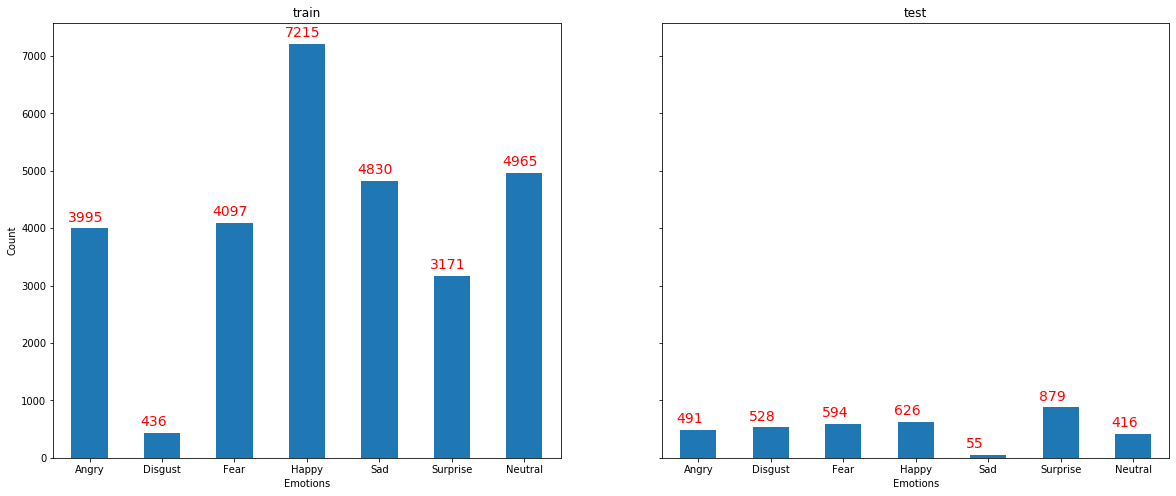

In [11]:
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

def setup_axe(axe,df,title):
    df['emotion'].value_counts(sort=False).plot(ax=axe, kind='bar', rot=0)
    axe.set_xticklabels(emotion_labels)
    axe.set_xlabel("Emotions")
    axe.set_ylabel("Count")
    axe.set_title(title)
    
    # set individual bar lables using above list
    for i in axe.patches:
         axe.text(i.get_x()-.05, i.get_height()+120, \
                str(round((i.get_height()), 2)), fontsize=14, color='red',
                    rotation=0)

import matplotlib.pyplot as plt   
fig, axes = plt.subplots(1,2, figsize=(20,8), sharey=True)
setup_axe(axes[0],train_data,'train')
setup_axe(axes[1],test_data,'test')
plt.show()

In [12]:
features = np.array(features).reshape(-1,48,48,1)
test_features = np.array(test_features).reshape(-1,48,48,1)

features = features/255
test_features = test_features/255

labels = np_utils.to_categorical(labels)
labels_test =np_utils.to_categorical(labels_test)

In [13]:
train_data['pixel_values'].to_csv('features.csv')
train_data['emotion'].to_csv('labels.csv')

prefix = 'sagemaker/data'

sagemaker_session.upload_data('features.csv', key_prefix = prefix + '/training')
sagemaker_session.upload_data('labels.csv', key_prefix = prefix + '/training')

's3://sagemaker-us-east-2-972330131871/sagemaker/data/training/labels.csv'

In [14]:
print('Training features shape ',features.shape)
print('Training labels shape',labels.shape)
print('Testing features shape ',test_features.shape)
print('Testing labels shape',labels_test.shape)

Training features shape  (28709, 48, 48, 1)
Training labels shape (28709, 7)
Testing features shape  (3589, 48, 48, 1)
Testing labels shape (3589, 7)


In [15]:
%%time

import os
import re
import copy
import time
import io
import struct
from time import gmtime, strftime

import boto3
import sagemaker

role = sagemaker.get_execution_role()

region = boto3.Session().region_name

bucket = sagemaker.Session().default_bucket()   # Default S3 URI. Replace it with your S3 URI if you want.
prefix = 'sagemaker/data' # Used as part of the path in the bucket where you store data

def convert_data():
    data_partitions = [('train', features), ('test', test_features)]
    for data_partition_name, data_partition in data_partitions:
        print('{}: {} {}'.format(data_partition_name, data_partition[0].shape, data_partition[1].shape))
        lab = [t.tolist() for t in data_partition[1]]
        feat = [t.tolist() for t in data_partition[0]]
        
        if data_partition_name != 'test':
            examples = np.insert(feat, 0, lab, axis=1)
        else:
            examples = feat


        examples = np.insert(feat, 0, lab, axis=1)  
        print(examples.reshape((2,-1)))
        np.savetxt('data.csv', examples.reshape((2,-1)), delimiter=',')

        key = "{}/{}/examples".format(prefix,'train')
        url = 's3://{}/{}'.format(bucket, key)
        boto3.Session().resource('s3').Bucket(bucket).Object(key).upload_file('data.csv')
        print('Done writing to {}'.format(url))
        
convert_data()


train: (48, 48, 1) (48, 48, 1)
[[0.31372549 0.31372549 0.31372549 ... 0.55294118 0.35294118 0.2627451 ]
 [0.84313725 0.85490196 0.8627451  ... 0.20392157 0.29411765 0.3372549 ]]
Done writing to s3://sagemaker-us-east-2-972330131871/sagemaker/data/train/examples
test: (48, 48, 1) (48, 48, 1)
[[0.35294118 0.38431373 0.45490196 ... 0.98431373 0.99215686 0.99215686]
 [0.82745098 0.82352941 0.82352941 ... 0.         0.         0.        ]]
Done writing to s3://sagemaker-us-east-2-972330131871/sagemaker/data/train/examples
CPU times: user 503 ms, sys: 40.8 ms, total: 543 ms
Wall time: 786 ms


In [16]:
import sagemaker

from sagemaker import image_uris

container = sagemaker.image_uris.retrieve("xgboost", region, "1.2-1")

In [17]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense , Activation , Dropout ,Flatten
from tensorflow.python.keras.layers.convolutional import Conv2D
from tensorflow.python.keras.layers.convolutional import MaxPooling2D
from tensorflow.python.keras.metrics import categorical_accuracy
from tensorflow.python.keras.models import model_from_json
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.optimizers import *
from tensorflow.python.keras.layers.normalization import BatchNormalization
from sklearn.metrics import accuracy_score

In [18]:
%%writefile train.py
import argparse
import os, boto3
from sklearn.externals import joblib 
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense , Activation , Dropout ,Flatten
from tensorflow.python.keras.layers.convolutional import Conv2D
from tensorflow.python.keras.layers.convolutional import MaxPooling2D
from tensorflow.python.keras.metrics import categorical_accuracy
from tensorflow.python.keras.models import model_from_json
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.optimizers import *
from tensorflow.python.keras.layers.normalization import BatchNormalization
from sklearn.metrics import accuracy_score
from keras.callbacks import EarlyStopping
import pandas as pd


if __name__ == '__main__':
    
    parser = argparse.ArgumentParser()
    parser.add_argument('--train', type=str, 
                                default=os.environ['SM_CHANNEL_TRAIN'])

    args, _ = parser.parse_known_args()
    
    training_dir = args.train
    features = pd.read_csv(training_dir+'/features.csv',sep=',')
    labels = pd.read_csv(training_dir+'/labels.csv',sep=',')
   
    es = EarlyStopping(monitor='val_loss', patience = 2, mode = 'min', restore_best_weights=True)
    model = Sequential()
    input_shape = (48,48,1)
    
    model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
    model.summary()
    
    model.fit(x=features, y=labels, batch_size=64,
            epochs=10, steps_per_epoch =len(features)/64)

    print('Validation loss    :', score[0])
    print('Validation accuracy:', score[1])


Overwriting train.py


In [19]:
s3_output_location = 's3://{}/{}/{}'.format(bucket, prefix, 'model_sdk')
train_data = 's3://{}/{}/{}'.format(bucket, prefix, 'training')
tf_estimator = TensorFlow(entry_point = 'train.py',
                          role = role, 
                          container = container,
                          framework_version = '1.11.0', 
                          py_version = 'py3',
                          train_instance_count=1,
                          train_instance_type = 'local',
                          output_path=s3_output_location,
                        hypenparameters = {
                            'epochs':10, 
                            'verbose':1,
                        })


train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [20]:
data = pd.read_csv('labels.csv')
features = pd.read_csv('features.csv')
df = pd.merge(data,features)
df.head()

,Unnamed: 0,emotion,pixel_values
0,0,0,[[103 104 134 ... 51 45 60]\n [136 115 105 ...
1,1,0,[[ 80 80 88 ... 165 170 170]\n [ 80 81 88 ...
2,2,0,[[135 142 135 ... 69 49 57]\n [141 147 135 ...
3,3,0,[[ 73 23 25 ... 122 119 117]\n [ 31 25 20 ...
4,4,0,[[150 151 153 ... 35 51 77]\n [152 155 156 ...


In [22]:
tf_estimator.fit({'train':train_data})


Creating tmpr60vdbb0_algo-1-q364r_1 ... 
Attaching to tmpr60vdbb0_algo-1-q364r_12mdone
algo-1-q364r_1  | 2021-01-15 17:00:44,121 sagemaker-containers INFO     Imported framework sagemaker_tensorflow_container.training
algo-1-q364r_1  | 2021-01-15 17:00:44,128 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
algo-1-q364r_1  | 2021-01-15 17:00:44,354 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
algo-1-q364r_1  | 2021-01-15 17:00:44,374 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
algo-1-q364r_1  | 2021-01-15 17:00:44,388 sagemaker-containers INFO     Invoking user script
algo-1-q364r_1  | 
algo-1-q364r_1  | Training Env:
algo-1-q364r_1  | 
algo-1-q364r_1  | {
algo-1-q364r_1  |     "additional_framework_parameters": {},
algo-1-q364r_1  |     "channel_input_dirs": {
algo-1-q364r_1  |         "train": "/opt/ml/input/data/train"
algo-1-q364r_1  |     },
algo-1-q364r_1  |     "current_host": "algo-1-q3

RuntimeError: Failed to run: ['docker-compose', '-f', '/tmp/tmpr60vdbb0/docker-compose.yaml', 'up', '--build', '--abort-on-container-exit'], Process exited with code: 1

In [ ]:
xgb_predictor = tf_estimator.deploy(initial_instance_count=1,
                                content_type='text/csv',
                                instance_type='ml.t2.medium'
                                )

In [ ]:
from sklearn.externals import joblib 
joblib.dump(tf_esimator, 'modelo_entrenado.pkl') 

In [ ]:
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from skimage import io
def predict_image(pic):
    img = image.load_img(pic, grayscale=True, target_size=(48, 48))
    show_img=image.load_img(pic, grayscale=False, target_size=(200, 200))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)

    x /= 255

    custom = model.predict(x)
    
    emotion_analysis(custom[0])

    x = np.array(x, 'float32')
    x = x.reshape([48, 48]);

    plt.gray()
    plt.imshow(show_img)
    plt.show()

    m=0.000000000000000000001
    a=custom[0]
    for i in range(0,len(a)):
        if a[i]>m:
            m=a[i]
            ind=i
        
    print('Expression Prediction:',objects[ind])

In [ ]:
predict_image('image.png')

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_true = np.argmax(labels_test, axis=1)
test_pred = np.argmax(model.predict(test_features), axis=1)
print("CNN Model Accuracy on testing data: {:.4f}".format(accuracy_score(test_true, test_pred)))